In [1]:
using sPop2
using Plots
using Statistics
using Distributions

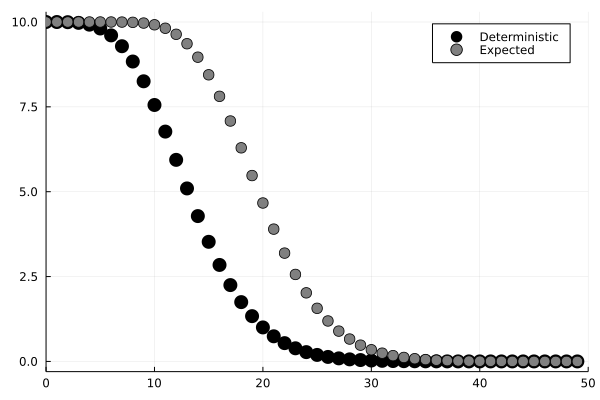

In [2]:
N = 10.0
mu = 20.0
sd = 5.0
pr1 = (devmn=mu,devsd=sd)

xr = 0:50

function simDet(hazard::HazTypes)
    pop = Population(PopDataDet())
    AddProcess(pop, hazard)
    AddPop(pop, N)
    retd = [0 N]
    for n in 1:50
        ret = StepPop(pop, pr1)
        retd = vcat(retd, [n ret[1]])
    end
    return retd
end

hazard = AccErlang()
retd = simDet(hazard)
k, theta, stay = hazard.pars(pr1)

plot(retd[:,1], retd[:,2], line = :scatter, c="black", ms=8, label="Deterministic")
plot!(xr, N*(1.0 .- cdf(Gamma(k,theta),xr)), line= :scatter, c="gray", ms=6, label="Expected")
display(xlims!(0,50))

MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey

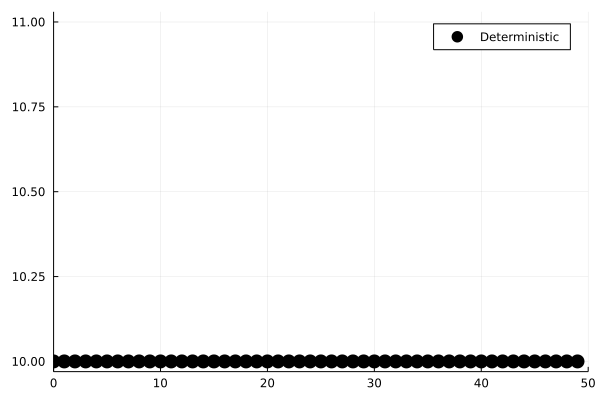

((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
MemberKey((0.0, -1, -1, -1, -1))
0.0 20.0 1.0 1 0 10.0 1.0
Member

In [2]:
N = 10.0
mu = 20.0
sd = 5.0
pr1 = (devmn=mu,devsd=sd)

xr = 0:50

function simDet(hazard::HazTypes)
    pop = Population(PopDataDet())
    AddProcess(pop, hazard)
    AddPop(pop, N)
    retd = [0 N]
    for n in 1:50
        ret = StepPop(pop, pr1)
        retd = vcat(retd, [n ret[1]])
    end
    return retd
end

function simStoch(hazard::HazTypes)
    pop = Population(PopDataSto())
    AddProcess(pop, hazard)
    rets = []
    for r in 1:1000
        AddPop(pop, Int64(N))
        ret = [Int64(N)]
        for n in 1:50
            sz = StepPop(pop, pr1)
            push!(ret, sz[1])
        end
        if rets == []
            rets = ret
        else
            rets = cat(rets,ret,dims=2)
        end
        EmptyPop(pop)
    end
    res = []
    for r in 1:size(rets)[1]
        p = quantile(rets[r,:],[0.05,0.5,0.95])
        if res == []
            res = p
        else
            res = hcat(res, p)
        end
    end
    return hcat(0:50,transpose(res))
end

hazards = ["ACC_ERLANG", "ACC_PASCAL", "ACC_FIXED", "AGE_FIXED", "AGE_GAMMA", "AGE_NBINOM"]
hazards = ["ACC_FIXED"]
for hazard in hazards
    if hazard == "ACC_ERLANG"
        hz = AccErlang()
    elseif hazard == "ACC_PASCAL"
        hz = AccPascal()
    elseif hazard == "ACC_FIXED"
        hz = AccFixed()
    elseif hazard == "AGE_FIXED"
        hz = AgeFixed()
    elseif hazard == "AGE_GAMMA"
        hz = AgeGamma()
    elseif hazard == "AGE_NBINOM"
        hz = AgeNbinom()
    end
    out_det = simDet(hz)
    #out_sto = simStoch(hz)
    k, theta, stay = hz.pars(pr1)
    #plot(out_sto[:,1], out_sto[:,4], fillrange = out_sto[:,2], title=hazard, c="#9ecae1", label="Stoch. (90% range)")
    #plot!(out_sto[:,1], out_sto[:,3], lw=4, c="#3182bd", label="Stoch. (median)")
    plot(out_det[:,1], out_det[:,2], line = :scatter, c="black", ms=8, label="Deterministic")
    if hazard in ["ACC_ERLANG" "AGE_GAMMA"]
        plot!(xr, N*(1.0 .- cdf(Gamma(k,theta),xr)), line= :scatter, c="gray", ms=6, label="Expected")
    elseif hazard in ["ACC_PASCAL" "AGE_NBINOM"]
        plot!(xr, N*(1.0 .- cdf(NegativeBinomial(k,theta),xr .- 1)), line= :scatter, c="gray", ms=6, label="Expected")
    end
    display(xlims!(0,50))
end

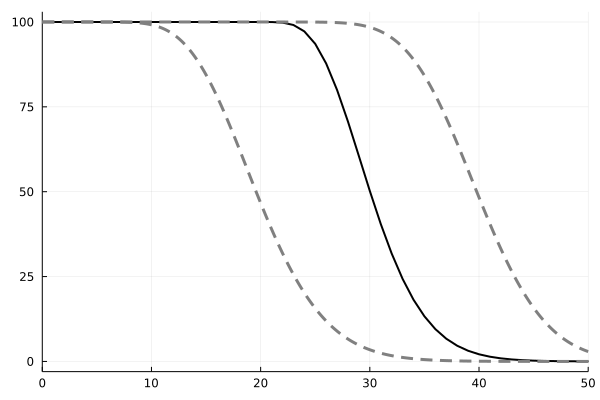

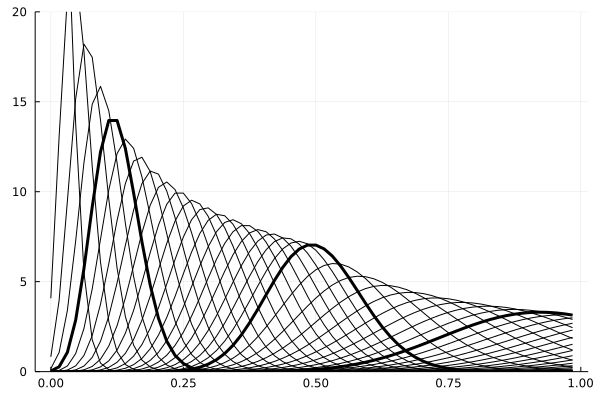

In [4]:
mu = [40.0 20.0]
sd = [5.0 5.0]
theta = sd .* sd ./ mu
k = mu ./ theta

xri = collect(0:199)
xr = collect(0:0.01:50)

a = Population(PopDataDet(), AccErlang())
AddPop(a, 100.0)

ii = [0 1]
retA = [0 GetPop(a)]
retL = [0 GetPoptable(a.data.poptable_current)]
for n in xri[2:end]
    i = n<=20 ? 1 : 2
    StepPop(a, mu[i], sd[i], 0.0)
    retA = vcat(retA, [n GetPop(a)])
    retL = vcat(retL, [n GetPoptable(a.data.poptable_current)])
    ii = vcat(ii,[n i])
end


plot(xri,retA[:,2], c="black", lw=2, legend=false)
for i in [2 1]
    plot!(xr,100*(1.0 .- cdf(Gamma(k[i],theta[i]), xr)), c="gray", lw=3, ls=:dash, legend=false)
end
display(xlims!((0, 50)))

plot(retL[1,2][2], c="black", legend = false)
for r in 2:50
    plot!(retL[r,2][2], c="black", lw=retL[r,1] in [5 20 29] ? 3 : 1, legend = false)
end
display(ylims!((0,20)))